In [3]:
import pandas as pd

In [117]:
df=pd.read_csv("aqi.csv")

In [7]:
df['pm25'].describe()

count    26093.000000
mean        87.190358
std         33.868981
min          5.000000
25%         63.000000
50%         82.000000
75%        107.000000
max        500.000000
Name: pm25, dtype: float64

In [9]:
from datetime import datetime

date_string = "7/2/2024"
date_format = "%m/%d/%Y"

# Convert to datetime object
date_object = datetime.strptime(date_string, date_format)

print("Datetime object:", date_object)

Datetime object: 2024-07-02 00:00:00


In [10]:
df['date_objects'] = pd.to_datetime(df['date'], format="%m/%d/%Y")

In [11]:
df.head()

,AQCC,Name,X,Y,date,pm25,pm10,o3,no2,so2,co,date_objects
0,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/2/2024,63.0,63.0,67.0,145.0,7.0,26.0,2024-07-02
1,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/3/2024,74.0,69.0,91.0,100.0,5.0,20.0,2024-07-03
2,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/4/2024,113.0,70.0,91.0,93.0,5.0,27.0,2024-07-04
3,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/5/2024,109.0,59.0,71.0,83.0,11.0,17.0,2024-07-05
4,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/7/2024,52.0,NaN,59.0,53.0,7.0,23.0,2024-07-07


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37662 entries, 0 to 37661
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   AQCC          37662 non-null  int64         
 1   Name          37662 non-null  object        
 2   X             37662 non-null  float64       
 3   Y             37662 non-null  int64         
 4   date          37662 non-null  object        
 5   pm25          26093 non-null  float64       
 6   pm10          26154 non-null  float64       
 7   o3            19417 non-null  float64       
 8   no2           27338 non-null  float64       
 9   so2           26836 non-null  float64       
 10  co            26131 non-null  float64       
 11  date_objects  37662 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 3.4+ MB


In [14]:
df['year'] = df['date_objects'].dt.year
df['month'] = df['date_objects'].dt.month

In [15]:
df.head()

,AQCC,Name,X,Y,date,pm25,pm10,o3,no2,so2,co,date_objects,year,month
0,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/2/2024,63.0,63.0,67.0,145.0,7.0,26.0,2024-07-02,2024,7
1,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/3/2024,74.0,69.0,91.0,100.0,5.0,20.0,2024-07-03,2024,7
2,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/4/2024,113.0,70.0,91.0,93.0,5.0,27.0,2024-07-04,2024,7
3,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/5/2024,109.0,59.0,71.0,83.0,11.0,17.0,2024-07-05,2024,7
4,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/7/2024,52.0,NaN,59.0,53.0,7.0,23.0,2024-07-07,2024,7


In [23]:
filtered = df[df['date_objects'] >pd.Timestamp('2020-01-01')]


In [34]:
aq_df=df.groupby("Name").mean("pm25").reset_index()

In [35]:
aq_df

,Name,AQCC,X,Y,pm25,pm10,o3,no2,so2,co,year,month
0,"Tehran Aghdasyeh, Iran",1.0,543825.0001,3961881.0,68.443210,49.853081,40.903485,72.554762,13.245779,26.653731,2018.523517,6.488753
1,"Tehran Darous, Iran",15.0,541051.0001,3958533.0,90.568966,46.382143,52.651899,63.123529,19.338235,35.940887,2015.815735,7.581781
2,"Tehran Fath, Iran",14.0,530544.0001,3948378.0,107.376307,74.016139,47.445216,63.800530,16.646909,33.898096,2018.839760,6.573360
3,"Tehran Golbarg, Iran",6.0,545771.0001,3954234.0,70.722478,53.522244,55.028502,59.308131,11.185514,19.991011,2019.382612,6.493030
4,"Tehran Mahalati, Iran",16.0,541878.0001,3947227.0,46.166667,63.645597,32.450635,46.847711,11.255319,22.446843,2019.254237,6.701929
5,"Tehran Masoudiyeh, Iran",7.0,545185.0001,3943029.0,70.746590,57.469726,30.079794,57.237020,11.386364,18.861940,2019.327438,6.329046
6,"Tehran Pirozi, Iran",18.0,544672.0001,3950343.0,93.091413,65.918900,40.808687,49.880851,14.133566,24.970866,2019.293286,6.671967
7,"Tehran Poonak, Iran",5.0,529964.4583,3957586.0,67.012956,54.075183,43.168634,63.945009,10.092618,22.912166,2018.934459,6.568520
8,"Tehran Region 11, Iran",11.0,535270.0001,3947748.0,95.849961,47.774194,44.388158,77.395797,16.090323,38.704494,2018.916171,6.444114
9,"Tehran Region 16, Iran",12.0,536001.0001,3944615.0,91.727273,51.480929,31.516746,71.618273,23.356564,43.635667,2017.511079,6.271623


In [37]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'F')

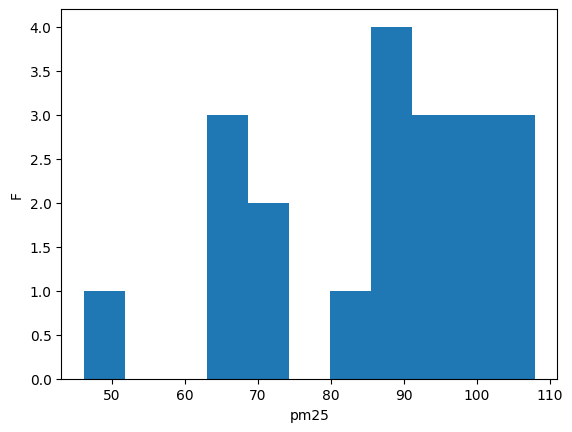

In [43]:
plt.hist(aq_df['pm25'],bins=11)
plt.xlabel('pm25')
plt.ylabel('F')

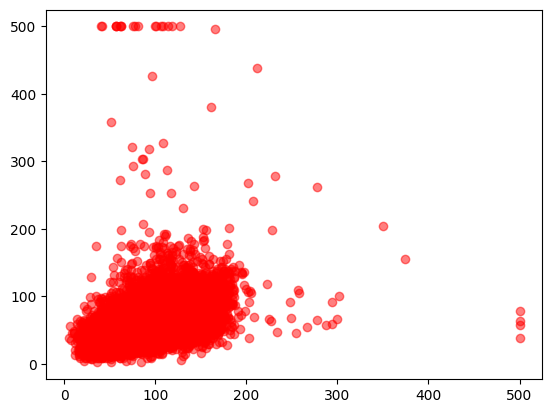

In [47]:
plt.scatter(df['pm25'],df['pm10'],c='red',alpha=0.5)

In [50]:
aq_df

,Name,AQCC,X,Y,pm25,pm10,o3,no2,so2,co,year,month
0,"Tehran Aghdasyeh, Iran",1.0,543825.0001,3961881.0,68.443210,49.853081,40.903485,72.554762,13.245779,26.653731,2018.523517,6.488753
1,"Tehran Darous, Iran",15.0,541051.0001,3958533.0,90.568966,46.382143,52.651899,63.123529,19.338235,35.940887,2015.815735,7.581781
2,"Tehran Fath, Iran",14.0,530544.0001,3948378.0,107.376307,74.016139,47.445216,63.800530,16.646909,33.898096,2018.839760,6.573360
3,"Tehran Golbarg, Iran",6.0,545771.0001,3954234.0,70.722478,53.522244,55.028502,59.308131,11.185514,19.991011,2019.382612,6.493030
4,"Tehran Mahalati, Iran",16.0,541878.0001,3947227.0,46.166667,63.645597,32.450635,46.847711,11.255319,22.446843,2019.254237,6.701929
5,"Tehran Masoudiyeh, Iran",7.0,545185.0001,3943029.0,70.746590,57.469726,30.079794,57.237020,11.386364,18.861940,2019.327438,6.329046
6,"Tehran Pirozi, Iran",18.0,544672.0001,3950343.0,93.091413,65.918900,40.808687,49.880851,14.133566,24.970866,2019.293286,6.671967
7,"Tehran Poonak, Iran",5.0,529964.4583,3957586.0,67.012956,54.075183,43.168634,63.945009,10.092618,22.912166,2018.934459,6.568520
8,"Tehran Region 11, Iran",11.0,535270.0001,3947748.0,95.849961,47.774194,44.388158,77.395797,16.090323,38.704494,2018.916171,6.444114
9,"Tehran Region 16, Iran",12.0,536001.0001,3944615.0,91.727273,51.480929,31.516746,71.618273,23.356564,43.635667,2017.511079,6.271623


In [52]:
aq_df.drop('Name',axis=1).corr()

,AQCC,X,Y,pm25,pm10,o3,no2,so2,co,year,month
AQCC,1.000000,-0.092726,0.314023,-0.276054,-0.177664,-0.169771,0.489901,-0.139490,-0.185001,0.017651,-0.009964
X,-0.092726,1.000000,0.008807,-0.390955,-0.453343,0.032594,0.139333,-0.122398,0.089323,0.026260,-0.020916
Y,0.314023,0.008807,1.000000,-0.368814,-0.566838,0.318755,0.349243,-0.374484,-0.119372,-0.371525,0.220917
pm25,-0.276054,-0.390955,-0.368814,1.000000,0.457546,0.168041,-0.122443,0.582183,0.482776,0.054654,0.005751
pm10,-0.177664,-0.453343,-0.566838,0.457546,1.000000,0.052197,-0.657745,0.122752,-0.326053,0.497685,0.125314
o3,-0.169771,0.032594,0.318755,0.168041,0.052197,1.000000,-0.153988,-0.020084,-0.066533,0.001302,0.570794
no2,0.489901,0.139333,0.349243,-0.122443,-0.657745,-0.153988,1.000000,0.197702,0.421622,-0.162948,-0.215579
so2,-0.139490,-0.122398,-0.374484,0.582183,0.122752,-0.020084,0.197702,1.000000,0.654341,-0.260998,0.185481
co,-0.185001,0.089323,-0.119372,0.482776,-0.326053,-0.066533,0.421622,0.654341,1.000000,-0.373502,-0.108568
year,0.017651,0.026260,-0.371525,0.054654,0.497685,0.001302,-0.162948,-0.260998,-0.373502,1.000000,-0.294445


In [54]:
import numpy as np

In [58]:
df=df.dropna()
np.corrcoef(df['pm25'],df['Y'])

array([[ 1.        , -0.23385419],
       [-0.23385419,  1.        ]])

In [61]:
from scipy import stats as spt 

In [63]:
spt.pearsonr(df['pm25'],df['Y'])

PearsonRResult(statistic=-0.23385418929857718, pvalue=9.72401573361008e-108)

In [65]:
import seaborn as sns

In [66]:

aq_co=aq_df.drop('Name',axis=1).corr()

<Axes: >

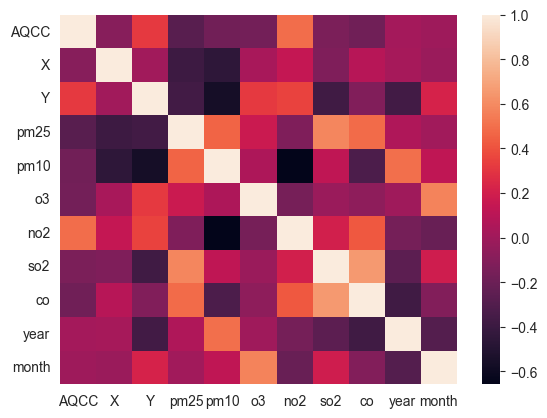

In [81]:
sns.set_style("darkgrid")

sns.heatmap(aq_co)

<Axes: xlabel='pm10', ylabel='pm25'>

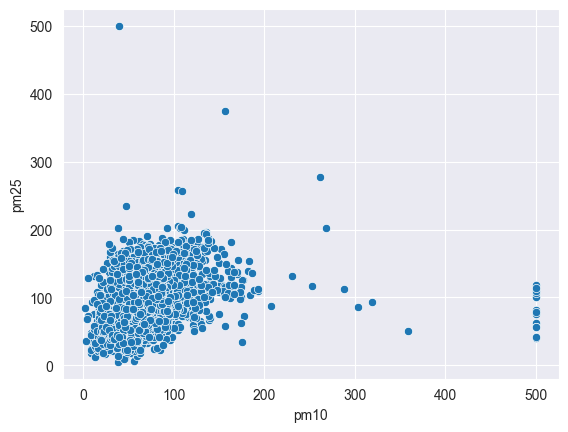

In [82]:
sns.scatterplot(data=df,x='pm10',y='pm25')

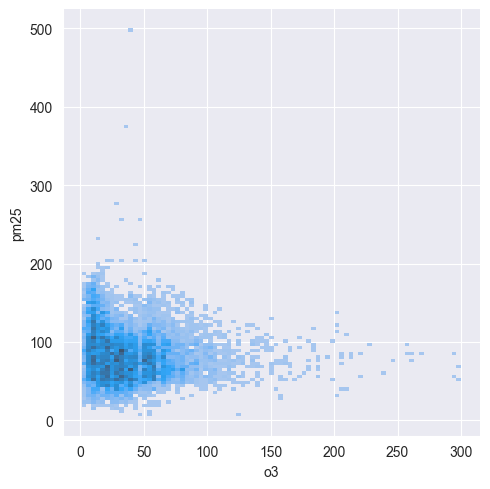

In [85]:
sns.displot(data=df,x='o3',y='pm25')

<Axes: xlabel='Y', ylabel='pm25'>

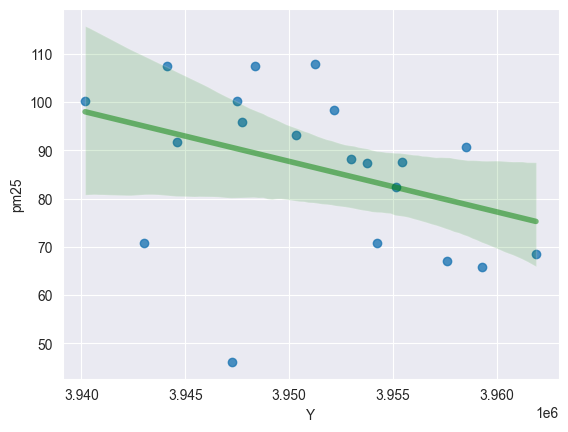

In [94]:
sns.regplot(data=aq_df,x='Y',y='pm25',line_kws={"color":'green','alpha':0.5,"lw":4})

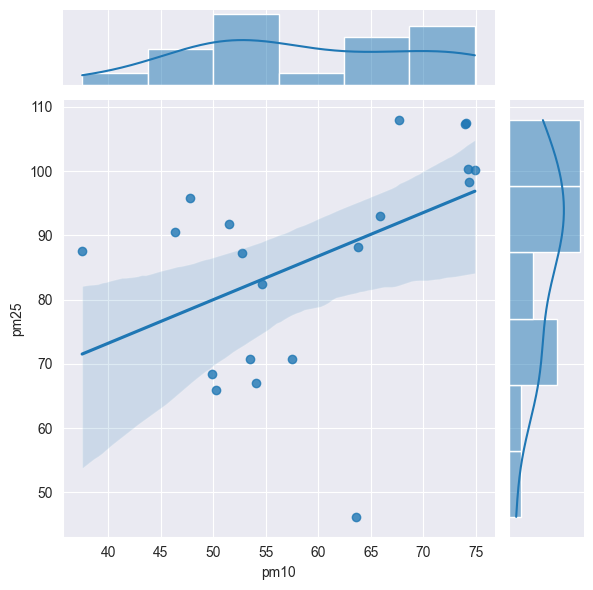

In [97]:
sns.jointplot(data=aq_df, x='pm10',y='pm25',kind='reg')

In [99]:
from sklearn.cluster import KMeans

In [102]:
X=df[['pm10','pm25','co','o3']]
K_Mean=KMeans(n_clusters=3)
K_Mean.fit(X)
df['cluster']=K_Mean.labels_

In [104]:
df

,AQCC,Name,X,Y,date,pm25,pm10,o3,no2,so2,co,date_objects,year,month,cluster
0,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/2/2024,63.0,63.0,67.0,145.0,7.0,26.0,2024-07-02,2024,7,2
1,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/3/2024,74.0,69.0,91.0,100.0,5.0,20.0,2024-07-03,2024,7,2
2,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/4/2024,113.0,70.0,91.0,93.0,5.0,27.0,2024-07-04,2024,7,2
3,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/5/2024,109.0,59.0,71.0,83.0,11.0,17.0,2024-07-05,2024,7,2
5,1,"Tehran Aghdasyeh, Iran",543825.0001,3961881,7/8/2024,47.0,43.0,64.0,55.0,7.0,12.0,2024-07-08,2024,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37433,20,"Tehran Tarbiyat Modares University, Iran",534703.3001,3952983,3/20/2015,44.0,37.0,25.0,15.0,12.0,37.0,2015-03-20,2015,3,0
37434,20,"Tehran Tarbiyat Modares University, Iran",534703.3001,3952983,3/21/2015,42.0,40.0,26.0,15.0,13.0,20.0,2015-03-21,2015,3,0
37435,20,"Tehran Tarbiyat Modares University, Iran",534703.3001,3952983,3/22/2015,38.0,20.0,24.0,11.0,8.0,13.0,2015-03-22,2015,3,0
37436,20,"Tehran Tarbiyat Modares University, Iran",534703.3001,3952983,3/23/2015,18.0,22.0,23.0,13.0,11.0,14.0,2015-03-23,2015,3,0


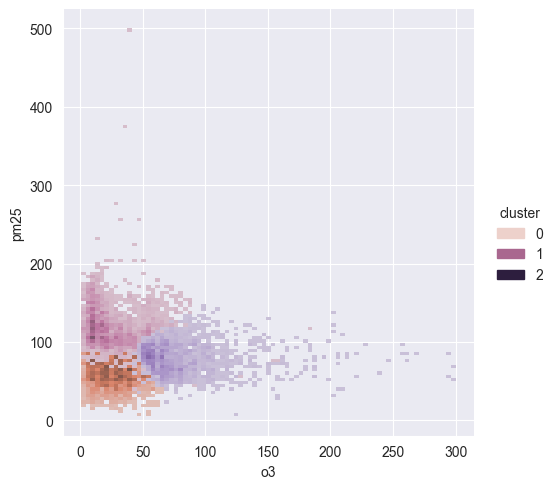

In [106]:
sns.displot(data=df,x='o3',y='pm25',hue='cluster')

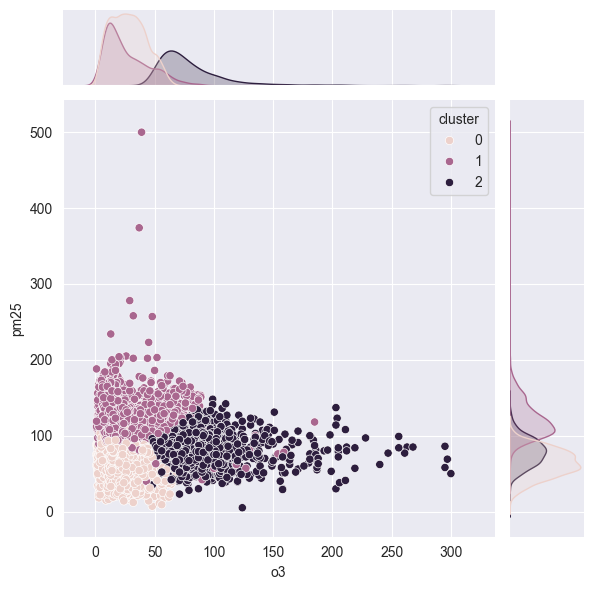

In [108]:
sns.jointplot(data=df,x='o3',y='pm25',hue='cluster')

In [111]:
import statsmodels.api as sm

In [121]:
df=df.dropna()

In [122]:
indepv=df['Y']
depv=df['pm25']

In [131]:
indepv=sm.add_constant(df[['Y','X']])


In [132]:
lm=sm.OLS(df['pm25'],indepv)

In [133]:
result=lm.fit()

In [134]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pm25   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          5.03e-156
Time:                        19:35:38   Log-Likelihood:                -41945.
No. Observations:                8647   AIC:                         8.390e+04
Df Residuals:                    8644   BIC:                         8.392e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5837.7537    227.098     25.706      0.000    5392.587    6282.920
Y             -0.0014   5.66e-05    -24.171      0.000      -0.001      -0.001
X             -0.0007   4.31e-05    -15.235      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     1927.100   Durbin-Watson:                   0.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9229.203
Skew:                           1.001   Prob(JB):                         0.00
Kurtosis:                       7.649   Cond. No.                     2.72e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
from pysal.lib import weights
from pysal.explore import esda
import geopandas as gpd


In [139]:
gdf=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.X, df.Y),crs='epsg:32639')

In [141]:
w=weights.Queen.from_dataframe(gdf)
moran=esda.Moran(gdf['pm25'],w)
moran.I

C:\Users\Taha\AppData\Local\Temp\ipykernel_22620\2885375380.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w=weights.Queen.from_dataframe(gdf)


0.04952009339569387

In [144]:
mapclust=esda.Moran_Local(gdf['pm25'],w)
gdf['local_moran']=mapclust.q

<Axes: >

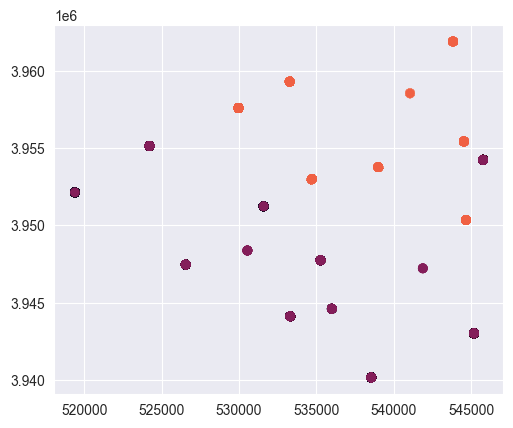

In [145]:
gdf.plot(column='local_moran')